##### DFT

##### Date: 7/12/2023

#### AIM: 

Write a program to find the DFT of a sequence using DSP processor.

#### THEORY:

The DFT X[k] of a finite length sequence x[n] defined for n=0… N-1 can be obtained by sampling its DTFT X(e^jω)  on the ω axis between 0≤ω<2π at ω_k=2πk/N  ,k=0...N-1.  Ie.

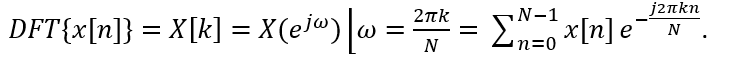

Using the commonly used notation

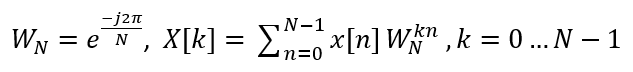

Using Euler’s relation e^(-jθ)=cosθ -jsinθ, the real and imaginary parts of X[k] are:

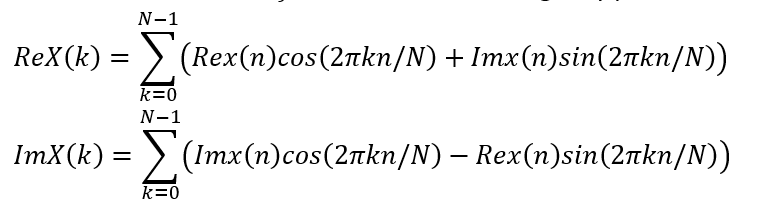

The function  dft() in the program below implements the above two equations to compute DFT. A structure COMPLEX array is used to store the real and imaginary parts of x[n] and X[k].  The computations are performed in-place with the input array over-written by the output array. The program computes the 64-point DFT on the 64 samples of a 1KHz signal sampled at 8000Hz. 

##### CODE:
```
#include <math.h>
#define PI 3.1415926535897
#define M 64 //signal length
#define N 64 //DFT length
typedef struct
{
    float real;
    float imag;
} COMPLEX;
void dft(COMPLEX *);

void main()
{
    int n;
    float F = 1000.0, Fs = 8000.0;
    COMPLEX samples[N]={0.0};

//Generate time-domain signal
    for (n = 0; n < M; n++) //M samples of x[n]
    {
        samples[n].real = cos(2 * PI * F * n / Fs);
        samples[n].imag = 0.0;
    }

    
    dft(samples); //call DFT function
    
}

void dft(COMPLEX *x)
{
    COMPLEX result[N];
    int k, n;
    for (k = 0; k < N; k++) // N point DFT
    {
        result[k].real = 0.0;
        result[k].imag = 0.0;
        for (n = 0; n < N; n++)
        {
            result[k].real += x[n].real * cos(2 * PI * k * n / N) +
                              x[n].imag * sin(2 * PI * k * n / N);
            result[k].imag += x[n].imag * cos(2 * PI * k * n / N) -
                              x[n].real * sin(2 * PI * k * n / N);
        }
    }
    for (k = 0; k < N; k++)
    {
        x[k] = result[k];
    }
}



```

##### Procedure: 
Insert a breakpoint in the code on the line calling the dft() function (To add a breakpoint, double click on the line number OR right-click anywhere on the line and clickBreakpoint(CCS) >Breakpoint. You should see a small blue mark on the line where the breakpoint is inserted). 
Build the project and Debug. 
The program will first halt at entry to main().Click Resume and program will halt at the  breakpoint. The array samples now contain the time-domain signal. We can visualize the signal using the Graph tool in CCS. Click on Tools>Graph>Single-Time. Set the Graph Properties as follows: 
Acquisition buffer size: 64 (since we have stored 64 samples of x[n])
DSP Data type: 32 bit floating point 
Index increment: 2
(The nature of the structure array samples is such that it comprises 2N float values ordered so that the first value is the real part of x[0],  the second is the imaginary part of x[0], the third is the real part of x[1], and so on.  Since x[n] is purely real, we take alternate values only)
Start Address: samples
Data plot style: Bar
Display Data Size: 64
Click Ok. The graph of x[n] should appear. 
Click Step Over and the program and will now halt after the function dft() returns. At this point, the array samples contain the 64 DFT coefficients X[k]. The graph now displays the real part of the X[k]. If needed, click on Reset the Graph button and then Refresh button in the graph window. You should see two distinct peaks at k= 8 and k=56. 
The spike at k=8 with amplitude =32 corresponds to the frequency 

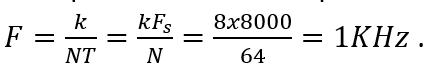

The spike at k=56 is a consequence of the fact that DFT of a real x[n] is conjugate symmetric; 

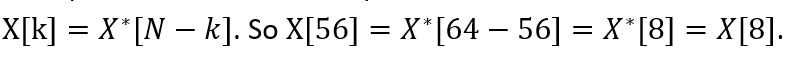

##### Result:
Successfully implemented and tested N point DFT